#Notas

##Regresión polinomial
###Grado 2

$y=a_0+a_1+a_2x^2+e$

$S_r = \sum e^2 = \sum(y_i-a_0-a_1-a_2x_i^2)^2$

$\frac{dS_r}{da_0} = -2\sum(y_i-a_0-a_1-a_2x_i^2)=0$

$\sum(y_i-a_0-a_1-a_2x_i^2)=0$

$\sum y_i-\sum^{i=1}_n a_0-\sum a_1x_i-\sum a_2x_i^2=0$

$(\sum y_i)-na_0-a_1(\sum x_i)-a_2(\sum x^2_i)=0$

Error Estandar:

$ S_{\frac{y}{x}} = \sqrt{\frac{S_r}{n-(m+1)}} $

m: numero del grado

n: numero de puntos

#Ejemplo

In [56]:
x=[0,1,2,3,4,5]
y=[1,1,2.6,4.8,7.2,13]

In [57]:
import numpy
xx=[]
xy=[]
x3=[]
x4=[]
xxy=[]
st=[]
sr=[]



N=len(x)

#Sumatoria
sx=0
sy=0
sxx=0
sxy=0
sx3=0
sx4=0
sxxy=0
St=0
Sr=0



for i in range(N):
  sx=sx+x[i]
  sy=sy+y[i]


  xx.append(x[i]**2)
  xy.append(x[i]*y[i])
  x3.append(x[i]**3)
  x4.append(x[i]**4)
  xxy.append(xx[i]*y[i])

  sxy=sxy+xy[i]
  sxx=sxx+xx[i]
  sx3=sx3+x3[i]
  sx4=sx4+x4[i]
  sxxy=sxxy+xxy[i]



#Promedio
px=sx/N
py=sy/N


In [58]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones
# de la forma A.X=B
# INGRESO
A = numpy.array([[N,sx,sxx],
              [sx,sxx,sx3],
              [sxx,sx3,sx4]])

B = numpy.array([[sy],
              [sxy],
              [sxxy]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0

# Evitar truncamiento en operaciones
A = numpy.array(A,dtype=float) 

# Matriz aumentada
AB = numpy.concatenate((A,B),axis=1)
AB0 = numpy.copy(AB)

# Pivoteo parcial por filas
tamano = numpy.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = numpy.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = numpy.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
        
AB1 = numpy.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = numpy.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = numpy.copy(AB[:,ultcolumna])
X = numpy.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[  6.   15.   55.   29.6]
 [ 15.   55.  225.  114.4]
 [ 55.  225.  979.  494.8]]
Pivoteo parcial por filas
[[ 55.  225.  979.  494.8]
 [ 15.   55.  225.  114.4]
 [  6.   15.   55.   29.6]]
eliminacion hacia adelante
[[ 5.50000000e+01  2.25000000e+02  9.79000000e+02  4.94800000e+02]
 [ 1.77635684e-15 -6.36363636e+00 -4.20000000e+01 -2.05454545e+01]
 [-2.66453526e-15  0.00000000e+00  1.12000000e+01  6.44000000e+00]]
eliminación hacia atrás
[[ 1.00000000e+00  5.16758353e-16  2.06703341e-15  1.07857143e+00]
 [ 1.29103077e-15  1.00000000e+00 -0.00000000e+00 -5.66428571e-01]
 [-2.37904934e-16  0.00000000e+00  1.00000000e+00  5.75000000e-01]]
solución de X: 
[[ 1.07857143]
 [-0.56642857]
 [ 0.575     ]]


In [59]:

print("n =",N)
print("")
print("Sumatoria x:",sx)
print("Sumatoria y:",sy)
print("Sumatoria xy:",sxy)
print("Sumatoria xx:",sxx)
print("Sumatoria x3:",sx3)
print("Sumatoria x4:",sx4)
print("Sumatoria xxy:",sxxy)
print("")


print("Promedio x:",px)
print("Promedio y:",py)
print("")

a0=X[0]
a1=X[1]
a2=X[2]


for i in range(N):
  st.append((y[i]-py)**2)
  sr.append((y[i]-a0-a1*x[i]-a2*xx[i])**2)

  St=St+st[i]
  Sr=Sr+sr[i]


#Raices
Sy=numpy.sqrt(St/(N-1))
Syx=numpy.sqrt(Sr/(N-2))
r=numpy.sqrt(((St-Sr)/St))*100

print("a0=",a0)
print("a1=",a1)
print("a2=",a2)

print("")
print("St=",St)
print("Sr=",Sr)

print("Sy=",Sy)
print("Sy/x=",Syx)
print("r=",r,"%")


print("")
print("y=",a0,"+",a1,"x","+",a2,"x^2")



n = 6

Sumatoria x: 15
Sumatoria y: 29.599999999999998
Sumatoria xy: 114.4
Sumatoria xx: 55
Sumatoria x3: 225
Sumatoria x4: 979
Sumatoria xxy: 494.8

Promedio x: 2.5
Promedio y: 4.933333333333333

a0= [1.07857143]
a1= [-0.56642857]
a2= [0.575]

St= 106.61333333333333
Sr= [1.00371429]
Sy= 4.617647308604964
Sy/x= [0.50092771]
r= [99.5281604] %

y= [1.07857143] + [-0.56642857] x + [0.575] x^2


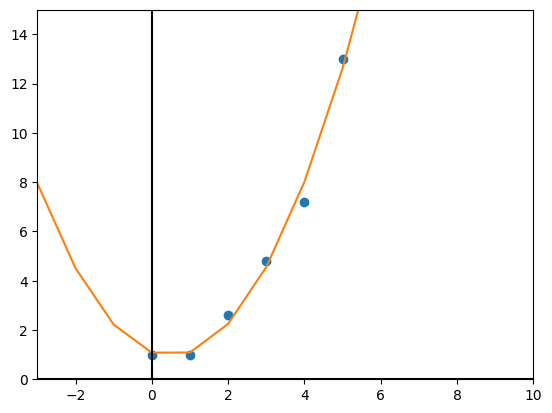

In [60]:
from matplotlib import pyplot

#Función
def fx(x,a0,a1,a2):
    return a0 + a1*x + a2*(x**2)
# Valores de X que toma el gráfico.
rango = range(-10, 15)

#Grafica
pyplot.plot(x,y, "o")
pyplot.plot(rango, [fx(i,a0,a1,a2) for i in rango])

#Color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

#Limites de los ejes
pyplot.xlim(-3, 10)
pyplot.ylim(0, 15)

pyplot.savefig("output.png")

pyplot.show()

#Taller 20

In [49]:
x=[0,1,2,3,4,5,6]
y=[4.2,1.4,0,-0.4,-0.1,1.6,4.1]

In [50]:
import numpy
xx=[]
xy=[]
x3=[]
x4=[]
xxy=[]
st=[]
sr=[]



N=len(x)

#Sumatoria
sx=0
sy=0
sxx=0
sxy=0
sx3=0
sx4=0
sxxy=0
St=0
Sr=0



for i in range(N):
  sx=sx+x[i]
  sy=sy+y[i]


  xx.append(x[i]**2)
  xy.append(x[i]*y[i])
  x3.append(x[i]**3)
  x4.append(x[i]**4)
  xxy.append(xx[i]*y[i])

  sxy=sxy+xy[i]
  sxx=sxx+xx[i]
  sx3=sx3+x3[i]
  sx4=sx4+x4[i]
  sxxy=sxxy+xxy[i]



#Promedio
px=sx/N
py=sy/N


In [52]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones
# de la forma A.X=B
# INGRESO
A = numpy.array([[N,sx,sxx],
              [sx,sxx,sx3],
              [sxx,sx3,sx4]])

B = numpy.array([[sy],
              [sxy],
              [sxxy]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0

# Evitar truncamiento en operaciones
A = numpy.array(A,dtype=float) 

# Matriz aumentada
AB = numpy.concatenate((A,B),axis=1)
AB0 = numpy.copy(AB)

# Pivoteo parcial por filas
tamano = numpy.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = numpy.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = numpy.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
        
AB1 = numpy.copy(AB)

# eliminacion hacia adelante
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = numpy.copy(AB)

# elimina hacia atras
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = numpy.copy(AB[:,ultcolumna])
X = numpy.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante')
print(AB2)
print('eliminación hacia atrás')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[   7.    21.    91.    10.8]
 [  21.    91.   441.    32.4]
 [  91.   441.  2275.   183.8]]
Pivoteo parcial por filas
[[  91.   441.  2275.   183.8]
 [  21.    91.   441.    32.4]
 [   7.    21.    91.    10.8]]
eliminacion hacia adelante
[[ 9.10000000e+01  4.41000000e+02  2.27500000e+03  1.83800000e+02]
 [ 0.00000000e+00 -1.07692308e+01 -8.40000000e+01 -1.00153846e+01]
 [ 0.00000000e+00  1.77635684e-15  1.68000000e+01  8.68000000e+00]]
eliminación hacia atrás
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  4.12619048e+00]
 [-0.00000000e+00  1.00000000e+00 -0.00000000e+00 -3.10000000e+00]
 [ 0.00000000e+00  1.05735526e-16  1.00000000e+00  5.16666667e-01]]
solución de X: 
[[ 4.12619048]
 [-3.1       ]
 [ 0.51666667]]


In [53]:

print("n =",N)
print("")
print("Sumatoria x:",sx)
print("Sumatoria y:",sy)
print("Sumatoria xy:",sxy)
print("Sumatoria xx:",sxx)
print("Sumatoria x3:",sx3)
print("Sumatoria x4:",sx4)
print("Sumatoria xxy:",sxxy)
print("")


print("Promedio x:",px)
print("Promedio y:",py)
print("")

a0=X[0]
a1=X[1]
a2=X[2]


for i in range(N):
  st.append((y[i]-py)**2)
  sr.append((y[i]-a0-a1*x[i]-a2*xx[i])**2)

  St=St+st[i]
  Sr=Sr+sr[i]


#Raices
Sy=numpy.sqrt(St/(N-1))
Syx=numpy.sqrt(Sr/(N-2))
r=numpy.sqrt(((St-Sr)/St))*100

print("a0=",a0)
print("a1=",a1)
print("a2=",a2)

print("")
print("St=",St)
print("Sr=",Sr)

print("Sy=",Sy)
print("Sy/x=",Syx)
print("r=",r,"%")


print("")
print("y=",a0,"+",a1,"x","+",a2,"x^2")



n = 7

Sumatoria x: 21
Sumatoria y: 10.799999999999999
Sumatoria xy: 32.4
Sumatoria xx: 91
Sumatoria x3: 441
Sumatoria x4: 2275
Sumatoria xxy: 183.8

Promedio x: 3.0
Promedio y: 1.5428571428571427

a0= [4.12619048]
a1= [-3.1]
a2= [0.51666667]

St= 22.477142857142855
Sr= [0.05380952]
Sy= 1.9355078083517194
Sy/x= [0.1037396]
r= [99.88022996] %

y= [4.12619048] + [-3.1] x + [0.51666667] x^2


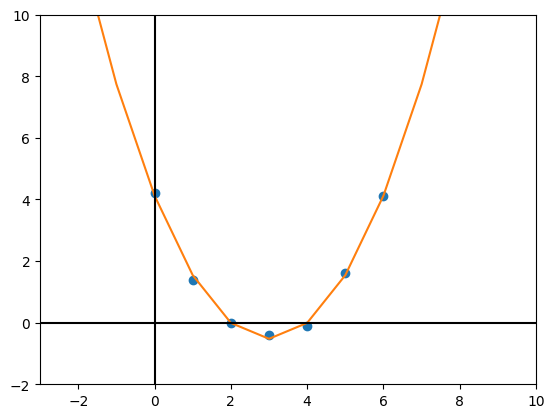

In [55]:
from matplotlib import pyplot

#Función
def fx(x,a0,a1,a2):
    return a0 + a1*x + a2*(x**2)
# Valores de X que toma el gráfico.
rango = range(-10, 15)

#Grafica
pyplot.plot(x,y, "o")
pyplot.plot(rango, [fx(i,a0,a1,a2) for i in rango])

#Color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

#Limites de los ejes
pyplot.xlim(-3, 10)
pyplot.ylim(-2, 10)

pyplot.savefig("output.png")

pyplot.show()